In [11]:
#%matplotlib Qt 
%matplotlib inline
# za interaktivno uporabo knjižnice za risanje grafov je morda potrebno izbrati 
# ustrezen backend za vašo namestitev, ki bo različen od Qt
import numpy as np
import matplotlib.pyplot as plt

## Uporaba python seznamov in numpy tabel

In [12]:
# python spremenljivke (index se začne od 0)

a = 1 # celo število
B = [1, 2, 3, 4] # seznam
B[2] = 8 # nastavimo vrednost v seznam
C = [[1, 2, 3, 4], [5, 6, 7, 8], [1, 1, 1, 1]] # 2D seznam
C[2][1] = 7 # nastavimo vrednost v 2D seznam

In [13]:
print(C)

# ali kot zadnji izraz v notebook celici

C

[[1, 2, 3, 4], [5, 6, 7, 8], [1, 7, 1, 1]]


[[1, 2, 3, 4], [5, 6, 7, 8], [1, 7, 1, 1]]

In [14]:
# matematične operacije

a = 4
B = np.array([1, 2, 3, 4])
C = B * a

In [15]:
print(a)
print()
print(B)
print()
print(C)

4

[1 2 3 4]

[ 4  8 12 16]


In [16]:
A = np.array([[1, 2, 3], [4, 5, 6]]) # oblike 2x3
B = np.array([[1, 4], [2, 5], [3, 6]]) # oblike 3x2
C = A @ B # matrično množenje, notranji produkt, rezultat je oblike 2x2

In [17]:
print(A)
print()
print(B)
print()
print(C)

[[1 2 3]
 [4 5 6]]

[[1 4]
 [2 5]
 [3 6]]

[[14 32]
 [32 77]]


In [18]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[1, 0], [0, 1]])
C = A*B # množenje istoležnih elementov

In [9]:
print(A)
print()
print(B)
print()
print(C)

[[1 2]
 [3 4]]

[[1 0]
 [0 1]]

[[1 0]
 [0 4]]


In [19]:
a = 4
B = np.array([[1, 2], [3, 4]])
C = a + B

In [20]:
print(a)
print()
print(B)
print()
print(C)

4

[[1 2]
 [3 4]]

[[5 6]
 [7 8]]


In [21]:
# funkcije

A = [[1, 2], [3, 4]] # funkcije iz knjižnice numpy delujejo tudi nad običajnimi seznami, ti se pretvoriju v np.array
B = np.size(A)
C = np.shape(A)
D = np.max(A)
E = np.min(A)
S = np.sum(A)
P = np.prod(A)

In [22]:
print(A)
print(B)
print(C)
print(D)
print(E)
print(S)
print(P)

[[1, 2], [3, 4]]
4
(2, 2)
4
1
10
24


In [26]:
# za tip np.ndarray so nekatere funkcije na voljo tudi kot metode ali člani
A = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
N = A.ndim
B = A.shape
C = np.max(A)
D = np.min(A)

In [27]:
print(A)
print(B)
print(C)
print(D)

[[1 2 3 4]
 [5 6 7 8]]
(2, 4)
8
1


In [28]:
A = [1, 5, 3, 2]
B = np.sort(A)
print(B)

[1 2 3 5]


In [29]:
# metode iz lastnih modulov 
import minmax

minmax.minmax(A)

(1, 5)

## Risanje diagramov s knjižnjico Matplotlib

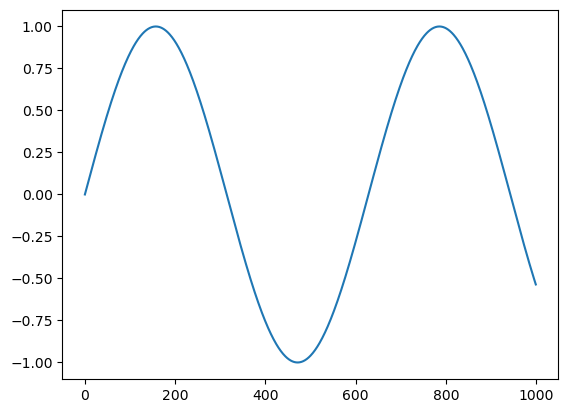

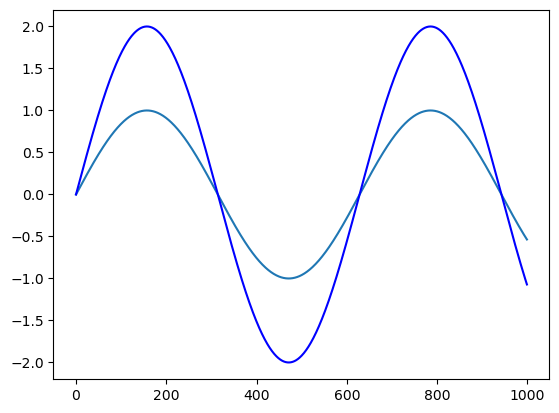

In [30]:
# grafi

a = 1
f = 1
t = np.arange(0, 10, 0.01)
A = a * np.sin(t*f)

plt.plot(A)
plt.show()

plt.plot(A)
plt.plot(A*2, 'b')
plt.show()

## Delo z zvokom

### Branje

In [31]:
# beri zvok

from scipy.io import wavfile
Fs, y = wavfile.read("churchbell.wav")

In [35]:
print(Fs)
print(y.shape)
print(y.dtype)

#y = y.reshape(-1, 1) # formatiranje oblike vektorja
#print(y.shape)

11025
(104500,)
int16


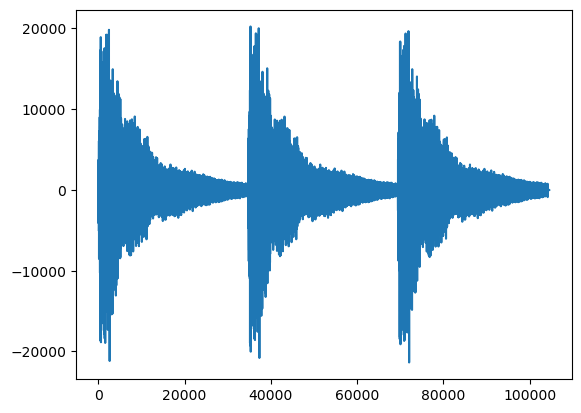

In [36]:
# izrisi zvok
plt.plot(y)
plt.show()

### Predvajanje

In [39]:
import sounddevice as sd
# predvajaj zvok

sd.play(y, Fs)
#sd.play(y.T, Fs) # predvajanje transponiranega vektorja ce imamo napacno obliko

In [40]:
sd.stop()

### Snemanje

In [41]:
dolzina=10
fs=44100
posnetek = sd.rec(int(dolzina * fs), samplerate=fs, channels=2)
# snemanje je asinhrona operacija (dogaja se v ozadju)
# to je lahko uporabno, ampak malce nenavadno kadar to polni tabelo posnetek
# zato pocakajmo, da zakljuci z snemanjem
sd.wait() 


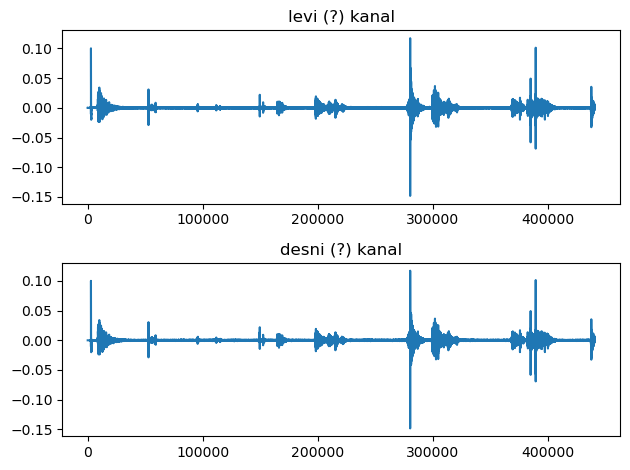

In [42]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(posnetek[:, 0])
# nismo ravno prepricani kateri kanal je levi in kateri desni
# bi morali nekako preveriti
ax[0].set_title('levi (?) kanal') 
ax[1].plot(posnetek[:, 1])
ax[1].set_title('desni (?) kanal')
fig.tight_layout()

In [43]:
sd.play(posnetek, fs)

In [44]:
sd.stop()